In [5]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [8]:
data = pd.read_csv("emotions.csv")
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [9]:
print(data["label"].unique())

['NEGATIVE' 'NEUTRAL' 'POSITIVE']


In [10]:
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
print(le.classes_)
# 0 - > Neg, 1 -> Neu, 2 -> Pos

['NEGATIVE' 'NEUTRAL' 'POSITIVE']


In [11]:
x = data.drop(columns="label")
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = data["label"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test.values, dtype=torch.long)

In [14]:
class EEGDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [15]:
train_dataset = EEGDataset(X_train_tensor, y_train_tensor)
test_dataset = EEGDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [16]:
class EEG(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2548, 128),  
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 3)
        )
    def forward(self, x):
        return self.model(x)

In [17]:
model = EEG()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
losses = []

for epoch in range(10):
    print(f"Epoch {epoch+1}")
    model.train()
    for batch, (X, y) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())  # ✅ collect loss
        print(f"Batch {batch+1}, Loss: {loss.item():.6f}")


Epoch 1
Batch 1, Loss: 1.095126
Batch 2, Loss: 0.837021
Batch 3, Loss: 0.809508
Batch 4, Loss: 0.668938
Batch 5, Loss: 0.579238
Batch 6, Loss: 0.491670
Batch 7, Loss: 0.402207
Batch 8, Loss: 0.491392
Batch 9, Loss: 0.390617
Batch 10, Loss: 0.343338
Batch 11, Loss: 0.249132
Batch 12, Loss: 0.383347
Batch 13, Loss: 0.232622
Batch 14, Loss: 0.272508
Batch 15, Loss: 0.276928
Batch 16, Loss: 0.174628
Batch 17, Loss: 0.179930
Batch 18, Loss: 0.300221
Batch 19, Loss: 0.229032
Batch 20, Loss: 0.096647
Batch 21, Loss: 0.191467
Batch 22, Loss: 0.252347
Batch 23, Loss: 0.167353
Batch 24, Loss: 0.141017
Batch 25, Loss: 0.213159
Batch 26, Loss: 0.204344
Batch 27, Loss: 0.117571
Epoch 2
Batch 1, Loss: 0.167978
Batch 2, Loss: 0.175590
Batch 3, Loss: 0.212489
Batch 4, Loss: 0.204063
Batch 5, Loss: 0.167021
Batch 6, Loss: 0.115095
Batch 7, Loss: 0.112732
Batch 8, Loss: 0.094404
Batch 9, Loss: 0.095910
Batch 10, Loss: 0.112771
Batch 11, Loss: 0.069984
Batch 12, Loss: 0.160398
Batch 13, Loss: 0.051509
Ba

In [19]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_preds = torch.argmax(test_outputs, dim=1)
    test_acc = (test_preds == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


Test Accuracy: 97.42%


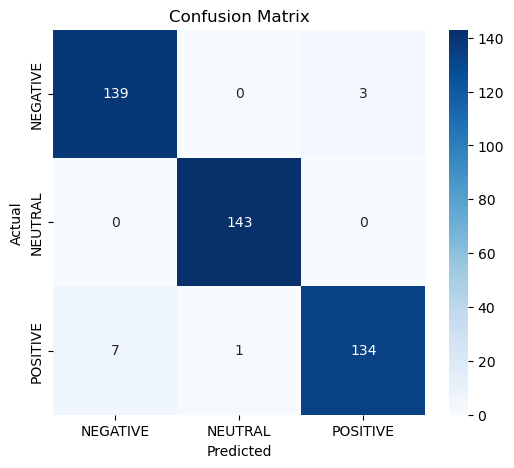

In [25]:
# Confusion matrix
cm = confusion_matrix(y_test_tensor, test_preds)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


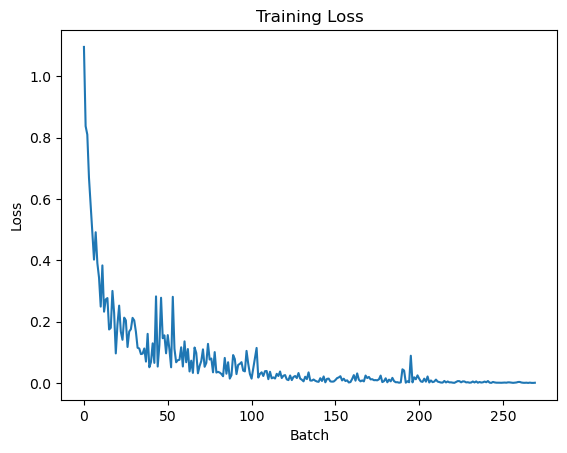

In [27]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
